In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
#import ml libraries
from  sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
 
from sklearn.pipeline import make_pipeline #utility function that constructs a pipeline by chaining together multiple steps.


In [4]:
df = pd.read_csv(r'C:\Users\ACER\Desktop\60 Days pf python\titanic\train.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


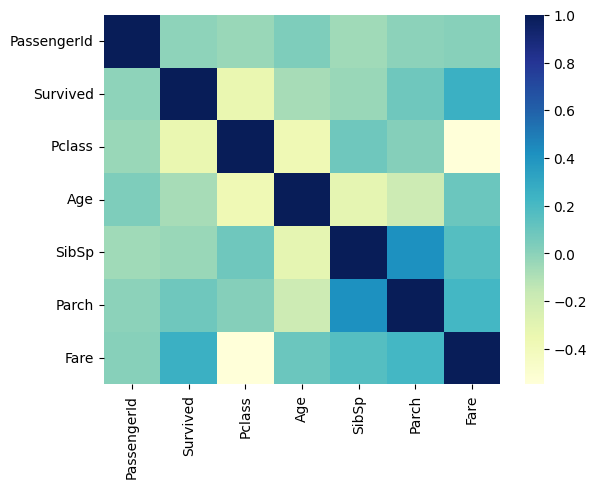

In [7]:
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1, test_size = 0.2)
for train_indices, test_indices in split.split(df,df[["Survived", "Pclass","Sex"]]):#to equalize ratio
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [9]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 611 to 735
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          145 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        39 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


<Axes: >

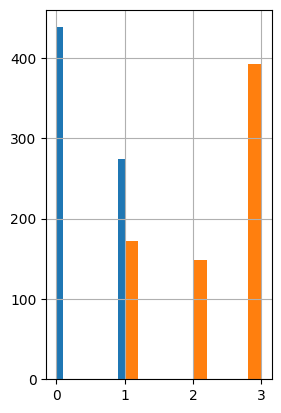

In [10]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
#Blue=survived, orange=pclass

<Axes: >

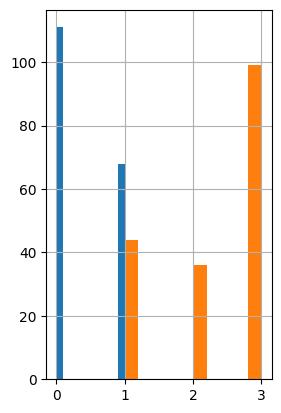

In [11]:
plt.subplot(1,2,1)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        imputer = SimpleImputer(strategy = "mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X
    

In [13]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    def transform(self,X):
        encoder= OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
    
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
            
        return X
     

In [14]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform (self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex", "N"], axis=1, errors="ignore")

In [15]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()), ("featureencoder", FeatureEncoder()), ("featuredropper", FeatureDropper())])

In [16]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 829 to 168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          569 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [17]:
 strat_train_set = pipeline.fit_transform(strat_train_set)

In [18]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
829,830,1,1,62.000000,0,0,80.0000,0.0,0.0,0.0,1.0,0.0
809,810,1,1,33.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
176,177,0,3,30.049807,3,1,25.4667,0.0,0.0,1.0,0.0,1.0
644,645,1,3,0.750000,2,1,19.2583,1.0,0.0,0.0,1.0,0.0
621,622,1,1,42.000000,1,0,52.5542,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
785,786,0,3,25.000000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
241,242,1,3,30.049807,1,0,15.5000,0.0,1.0,0.0,1.0,0.0
202,203,0,3,34.000000,0,0,6.4958,0.0,0.0,1.0,0.0,1.0
95,96,0,3,30.049807,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [19]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 829 to 168
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [20]:
from sklearn.preprocessing import StandardScaler

X =   strat_train_set.drop(['Survived'], axis=1)
y=strat_train_set['Survived']

scaler =  StandardScaler()
X_data = scaler.fit_transform(X)
y_data= y.to_numpy()

In [21]:
X_data

array([[ 1.50378418e+00, -1.56828591e+00,  2.41169738e+00, ...,
        -1.64570147e+00,  1.35941164e+00, -1.35941164e+00],
       [ 1.42569401e+00, -1.56828591e+00,  2.22689529e-01, ...,
         6.07643620e-01,  1.35941164e+00, -1.35941164e+00],
       [-1.04585991e+00,  8.27893418e-01,  2.68169590e-16, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       ...,
       [-9.44342688e-01,  8.27893418e-01,  2.98172558e-01, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.36212510e+00,  8.27893418e-01,  2.68169590e-16, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.07709598e+00, -1.56828591e+00,  2.68169590e-16, ...,
         6.07643620e-01, -7.35612358e-01,  7.35612358e-01]])

In [22]:
from sklearn.ensemble import RandomForestClassifier


In [23]:
clf= RandomForestClassifier() 

In [24]:
param_gird =[
    { "n_estimators":[20,100,200,400], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]
  
}]

grid_search = GridSearchCV(clf, param_gird, cv=2, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [20, 100, 200, 400]}],
             return_train_score=True, scoring='accuracy')

In [25]:
final_clf = grid_search.best_estimator_

In [26]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [27]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
747,748,1,2,"Sinkkonen, Miss. Anna",female,30.0,0,0,250648,13.0000,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
654,655,0,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S


In [28]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [29]:
scaler=StandardScaler()

In [30]:
X_data_test = scaler.fit_transform(X)
y_data_test= y.to_numpy()

In [31]:
final_clf.score(X_data_test, y_data_test)

0.8595505617977528

In [32]:
final_data= pipeline.fit_transform(df)

In [33]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [34]:
X_final= final_data.drop(['Survived'], axis=1)
y_final= final_data['Survived']

In [35]:
scaler = StandardScaler()


In [36]:
X_data_final=scaler.fit_transform(X_final)
y_data_final= y_final.to_numpy()

In [37]:
prod_clf= RandomForestClassifier() 
param_gird =[
    { "n_estimators":[20,100,200,400], "max_depth": [None, 5,10], "min_samples_split": [2,3,4]
  
}]

grid_search = GridSearchCV(prod_clf, param_gird, cv=2, scoring="accuracy", return_train_score= True)
grid_search.fit(X_data_final, y_data_final)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [20, 100, 200, 400]}],
             return_train_score=True, scoring='accuracy')

In [38]:
prod_final_clf= grid_search.best_estimator_

In [39]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=20)

In [40]:
final_clf.score(X_data_test, y_data_test)

0.8595505617977528

In [41]:
df_test_data = pd.read_csv(r"C:\Users\ACER\Desktop\60 Days pf python\titanic\test.csv")

In [42]:
df_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [43]:
final_test_data = pipeline.fit_transform(df_test_data)

In [44]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [45]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [46]:
X_final_test = final_test_data

In [47]:
X_final_test =X_final_test.fillna(method="ffill")

In [48]:
scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [49]:
predictions = prod_final_clf.predict(X_data_final_test) 

In [50]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
final_df=pd.DataFrame(df_test_data['PassengerId'])

In [53]:
final_df['Survived'] = predictions

final_df.to_csv("titanic/prediction.csv", index= False)

In [54]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
